In [1]:
# Set seeds for reproducibility -
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [2]:
from tensorflow.keras import datasets,layers,models 
import matplotlib.pyplot as plt

In [3]:
# load and prepare the fashion mnist dataset -
fashion_mnist = datasets.fashion_mnist
(train_images,train_labels) , (test_images,test_labels) = fashion_mnist.load_data()

### Data Processing - 

In [4]:
type(train_images)

numpy.ndarray

In [5]:
type(train_labels)

numpy.ndarray

In [6]:
print(len(train_images))

60000


In [7]:
print(len(train_labels))

60000


In [8]:
print(train_images[0].shape)

(28, 28)


In [9]:
print(train_images[0]) # the dataset contain images in a grayscale manner if the data contains images in RGB manner then the dimension would be (28,28,3) we have three channels

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

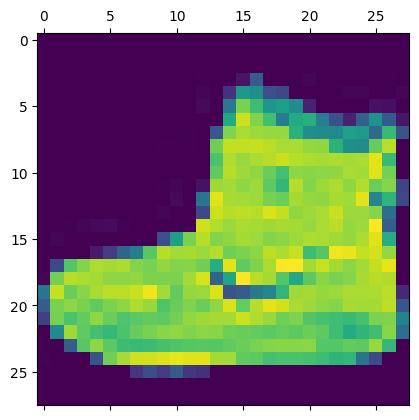

In [10]:
plt.matshow(train_images[0])

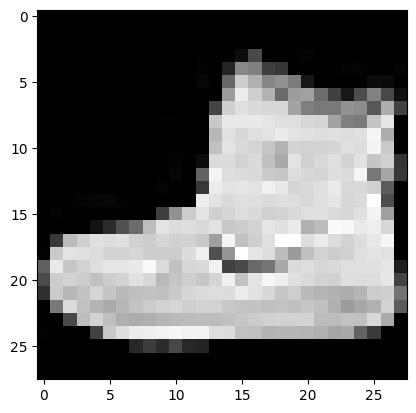

In [11]:
# All images should be of same size
plt.imshow(train_images[0],cmap='gray')
plt.show()

In [12]:
print(train_labels[0])

9


### We have 10 classes in this particular dataset -
['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [13]:
# Normalize the pixel values into 0 and 1 -
train_images,test_images = train_images/255.0,test_images/255.0

In [14]:
# Reshape images to specify that it's a single channel(grayscale)
train_images = train_images.reshape((train_images.shape[0],28,28,1)) # 1 - is channel information 1 defines grayscale images and 3 defines RGB
test_images = test_images.reshape((test_images.shape[0],28,28,1))

In [15]:
train_images.shape # Now the 1 has been added to the image dimensions that means all images are now converted into grayscale

(60000, 28, 28, 1)

In [16]:
test_images.shape

(10000, 28, 28, 1)

### Convolutional Neural Network -

In [17]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1))) # Adding first convolution layer to identify basic features
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu')) # Adding second convolution layer to identify the more complex features from the particular image
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

#Adding Dense layers - ANN implementation 
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10)) # in output layer always use the number of neurons = no. of classes  , linear activation function

c:\Users\user\miniconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


#### General meaning of optimizer is to find the best parameters or best features to achieve the best accuracy neural network model.

In [19]:
# Compile and train the model - 
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
history = model.fit(train_images,train_labels,epochs=5,
                    validation_data=[test_images,test_labels])

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 86s 41ms/step - accuracy: 0.7486 - loss: 0.6946 - val_accuracy: 0.8697 - val_loss: 0.3651
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 73s 39ms/step - accuracy: 0.8785 - loss: 0.3363 - val_accuracy: 0.8846 - val_loss: 0.3248
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 69s 37ms/step - accuracy: 0.8966 - loss: 0.2833 - val_accuracy: 0.8896 - val_loss: 0.3021
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 74s 39ms/step - accuracy: 0.9080 - loss: 0.2480 - val_accuracy: 0.8960 - val_loss: 0.2927
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 88s 42ms/step - accuracy: 0.9176 - loss: 0.2211 - val_accuracy: 0.8955 - val_loss: 0.2968


In [21]:
# Model Evaluation- 
test_loss , test_acc = model.evaluate(test_images,test_labels,verbose=2)
print("Test Accuracy:",test_acc)

313/313 - 4s - 11ms/step - accuracy: 0.8955 - loss: 0.2968
Test Accuracy: 0.8955000042915344


In [22]:
model.save('trained_fashion_mnist_model.h5')